# ***Optimization project - Regression on diamonds price***

The goal of this project is to compute the price of diamonds according to some characteristics. 



> ## *Importations*





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# Splitting the data 
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import normalize

>## *Loading up the data*

In [ ]:
#df = pd.read_csv('diamond.csv')
#df.head()

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dauphine/M2/Optimization/diamond.csv')
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


* Carat Weight: in grams

* Cut: how good the cut is

* Color: the color of the diamond

* Clarity: diamond clarity rating

* Polish: diamond polish rating

* Symmetry: diamond symmetry rating

* Report: which company has graded the diamond

Price: in US dollars

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat Weight,6000.0,1.334520,0.475696,0.75,1.0,1.13,1.59,2.91
Price,6000.0,11791.579333,10184.350051,2184.00,5150.5,7857.00,15036.50,101561.00


In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col,": ",df[col].unique())

Cut :  ['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal']
Color :  ['H' 'E' 'G' 'D' 'F' 'I']
Clarity :  ['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']
Polish :  ['VG' 'ID' 'EX' 'G']
Symmetry :  ['EX' 'ID' 'VG' 'G']
Report :  ['GIA' 'AGSL']


>## *Dataset visualzation*

A diamond's price is traditionnaly estimated with the 4C rule:    
* Carat Weight
* Cut
* Claritiy
* Color


So we are going to focus on these and we expect them to have an impact on the price.

>>### Carat Weight

A carat corresponds to a weight of 0.2 grams in jewellery-making.

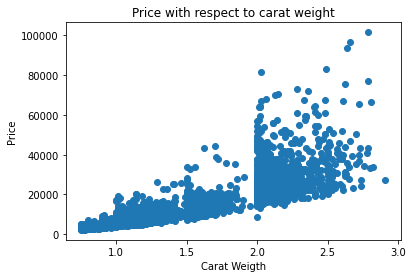

In [6]:
plt.scatter(x=df['Carat Weight'], y=df['Price'])
plt.title('Price with respect to carat weight')
plt.xlabel('Carat Weigth')
plt.ylabel('Price')
plt.show()

We see carat weight as an impact on the price of the diamond.

The heavier the diamond, the more expensive it is. 

>>### Cut

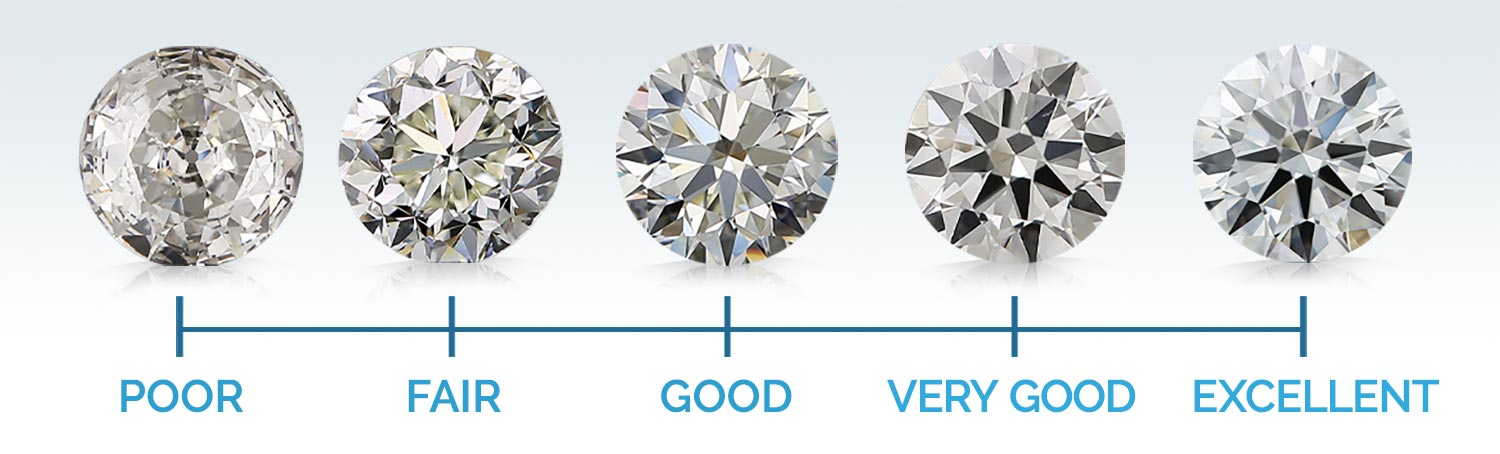

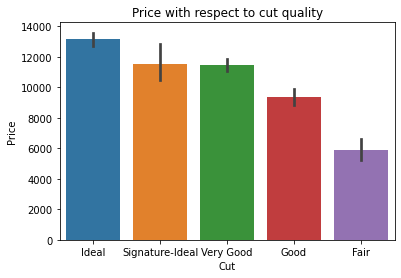

In [7]:
order = ['Fair', 'Good', 'Very Good', 'Signature-Ideal', 'Ideal']

sns.barplot(data=df, x='Cut', y='Price', order=order[::-1])
plt.title('Price with respect to cut quality')
plt.show()

The cut also matters, as the 4C rule stated, the more ideal the cut, the more expensive the diamond is.

>>### Clarity

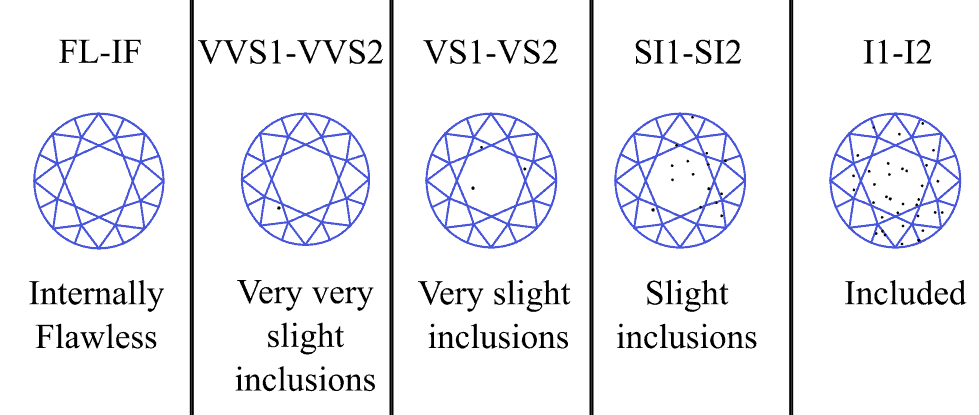

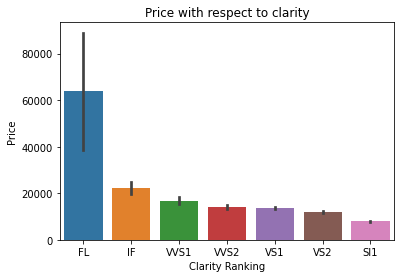

In [8]:
# Creating an decreasing order to concur with the image
order = df['Clarity'].value_counts().index[::-1]

sns.barplot(x='Clarity', y='Price', data=df, order=order)
plt.title('Price with respect to clarity')
plt.xlabel('Clarity Ranking')
plt.show()

The clearer the diamond, the more expensive it is.

>>### Color

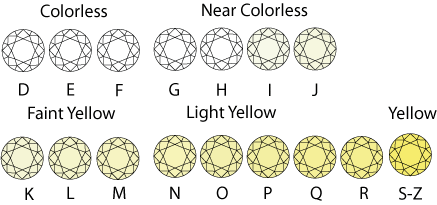

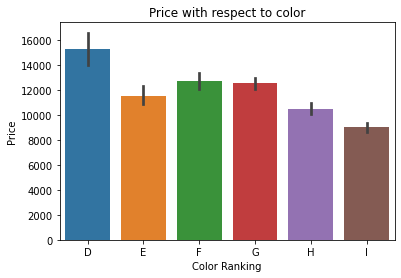

In [9]:
order = ['D','E','F','G','H','I']

sns.barplot(data=df, x='Color', y='Price', order=order)
plt.title('Price with respect to color')
plt.xlabel('Color Ranking')
plt.show()

We see that color matters as a transparent diamond has a higher price than colored one.

>>### Symmetry

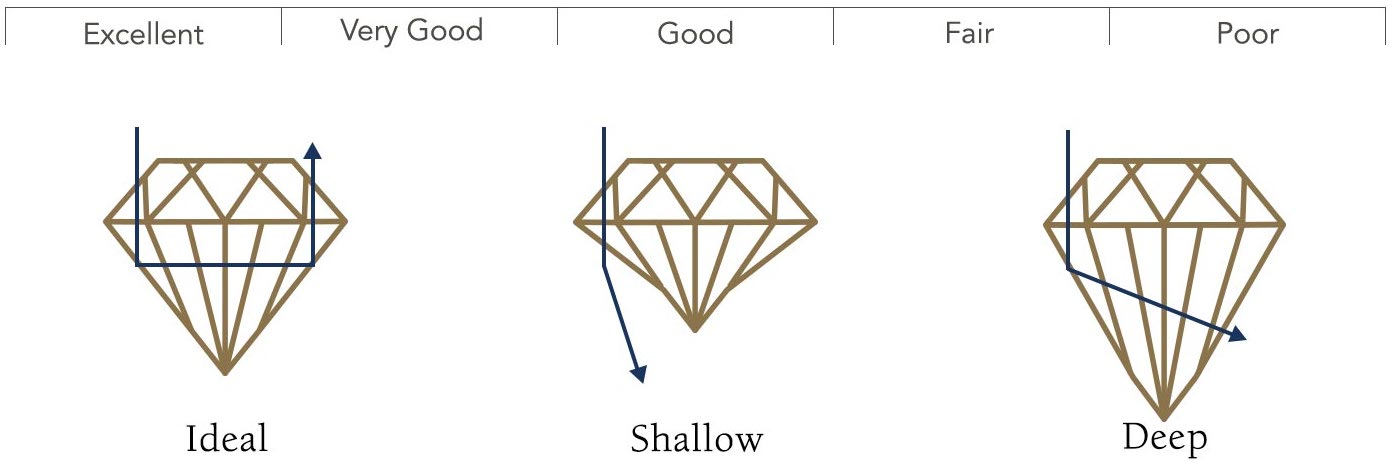

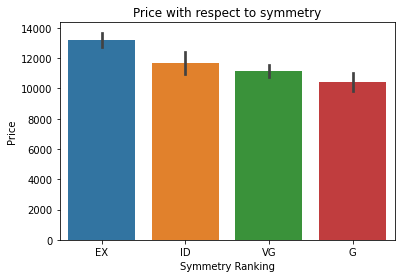

In [10]:
sns.barplot(data=df, x='Symmetry', y='Price')
plt.title('Price with respect to symmetry')
plt.xlabel('Symmetry Ranking')
plt.show()

We also see that the more perfect the symmetry is, the more expensive the diamond.

>> ### Polish

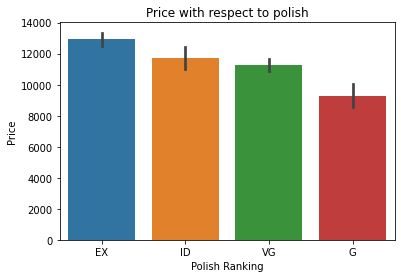

In [11]:
sns.barplot(data=df, x='Polish', y='Price', order=['EX', 'ID', 'VG', 'G'])
plt.title('Price with respect to polish')
plt.xlabel('Polish Ranking')
plt.show()

>>### Pie charts

<Figure size 720x720 with 0 Axes>

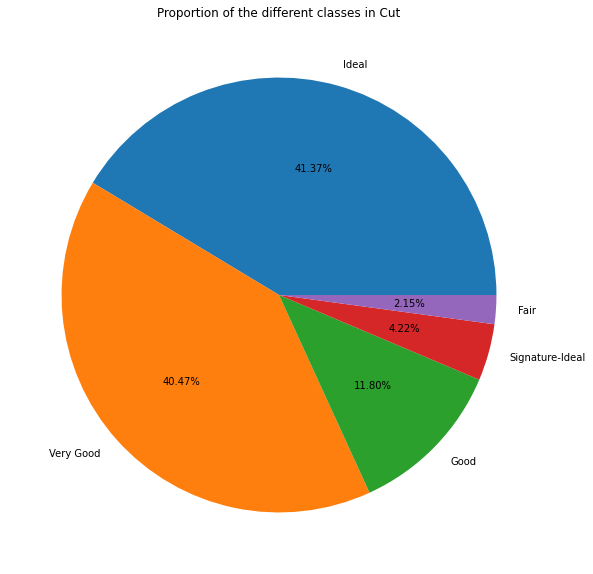

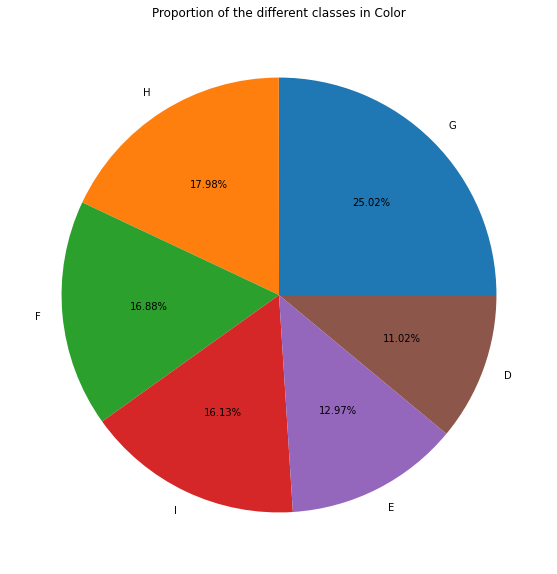

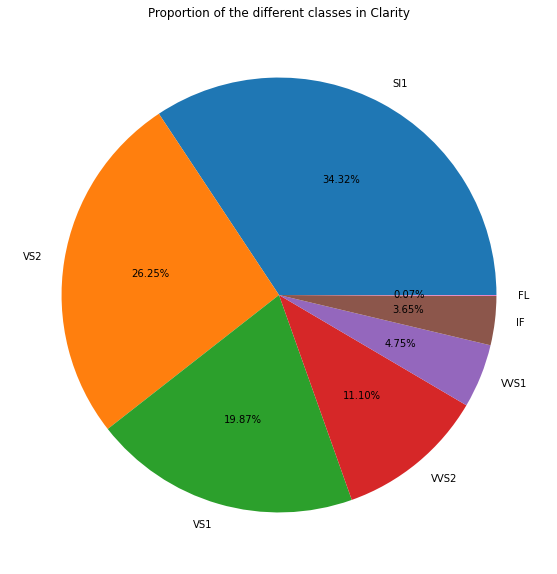

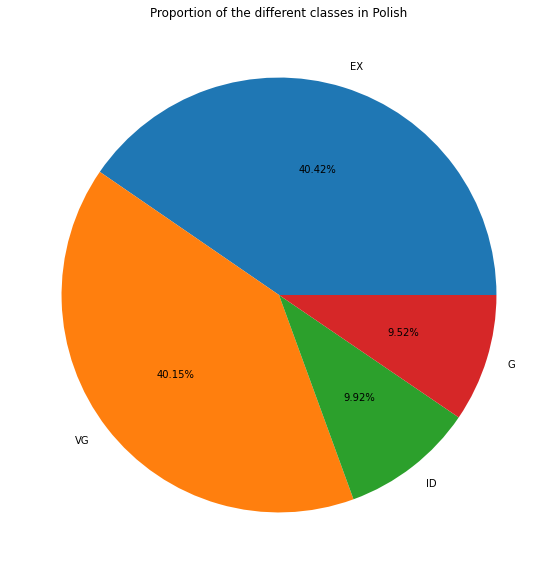

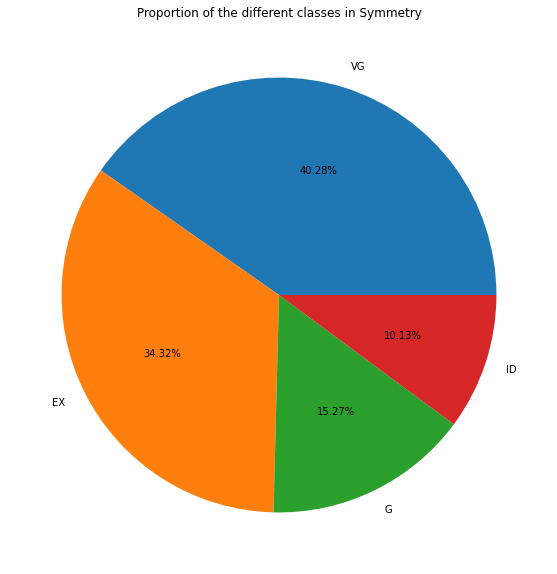

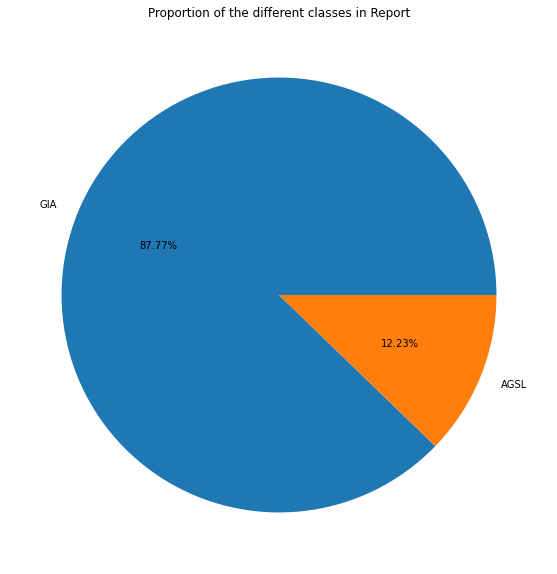

<Figure size 720x720 with 0 Axes>

In [12]:
for col in df.columns:
    plt.figure(figsize=(10, 10))
    if df[col].dtype == 'object':
        ax = plt.pie(x=df[col].value_counts(),labels=df[col].value_counts().index, autopct='%.2f%%')
        plt.title("Proportion of the different classes in {}".format(col))
        plt.show()

>## *Preprocessing*

First, we need to convert our ordinal values columns into numerical values. 

I encoded the ordinal values with some integers in order to reflect their ordering.

In [6]:
df_copie = df.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_copie['Report'] = pd.get_dummies(df['Report'])
df_copie['Cut'] = labelencoder.fit_transform(df['Cut'])
df_copie['Color'] = labelencoder.fit_transform(df['Color'])
df_copie['Clarity'] = labelencoder.fit_transform(df['Clarity'])
df_copie['Polish'] = labelencoder.fit_transform(df['Polish'])
df_copie['Symmetry'] = labelencoder.fit_transform(df['Symmetry'])

df_copie.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,0,5169
1,0.83,2,4,3,2,2,1,3470
2,0.85,2,4,2,0,0,0,3183
3,0.91,2,1,2,3,3,0,4370
4,0.83,2,3,2,0,0,0,3171


>>### Heatmap correlation

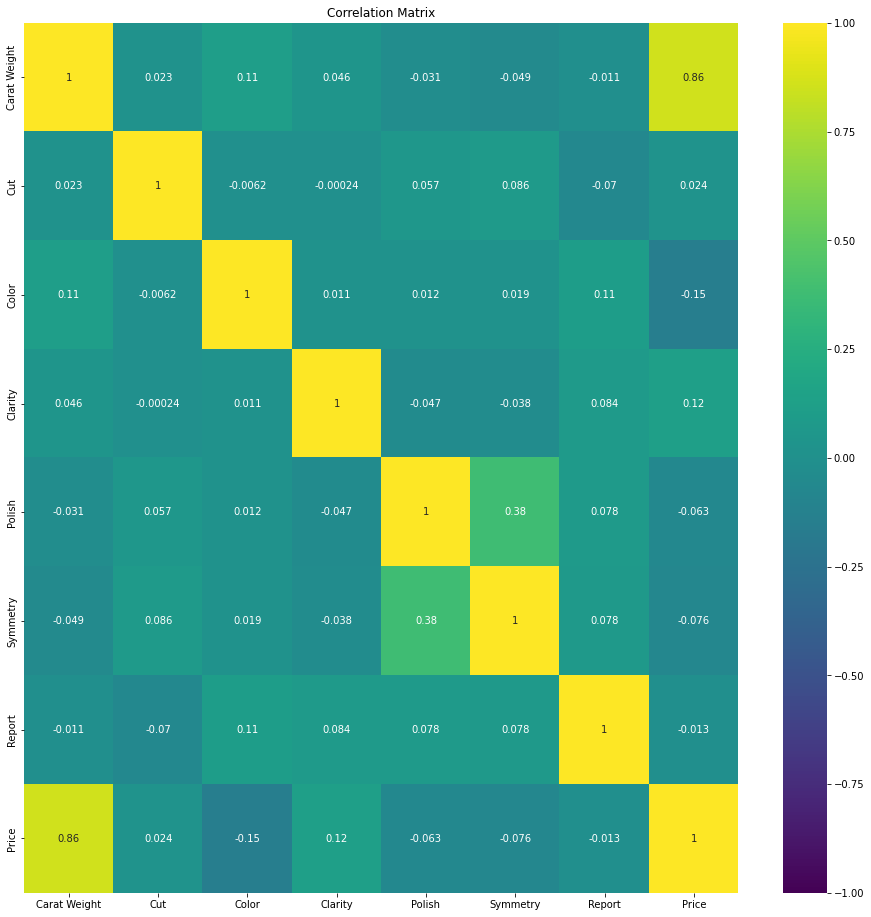

In [8]:
corr = df_copie.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

As stated by the 4C rule and shown by the different graphs above, the features that are the most correlated to the price are:
* Carat Weight
* Clarity
* Cut
* Color

Eventhough the color plays a lesser role than the other 3Cs.

>>### Data processing

In [9]:
X = df_copie.drop(['Price'], axis=1)
y = df_copie['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=3)

X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

# Reshaping y to a column vector
y_train = y_train.reshape((y_train.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))

In [10]:
print("X_train shape: {}  y_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}  y_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (5100, 7)  y_train shape: (5100, 1)
X_test shape: (900, 7)  y_test shape: (900, 1)


> ## *Models implementation*

We want to minimize the function $$\min_{w} f(w) = \frac{1}{n}\sum_{i=1}^n \ell(x_i^\top w, y_i)+R(w)$$
where $\ell(x_i^\top w, y) = \frac{1}{2}\|x_i^\top w - y\|^2$ (least square regression)

and $R(w) = \frac{1}{2}\|w\|^2$ for the Ridge regularization and $R(w) = \frac{1}{2}\|w\|_1$ for the Lasso regularization.

In [11]:
class Init:
  ''' Initializing class for all our Gradient Descent Algorithms '''
  
  def __init__(self, X, y):
    ''' Initialization method 
        -----------------------
        Inputs:
          X numpy.array of shape (n,m) -- the data
          y numpy.array of shape (n,1) -- the target
        Instanciates:
          n,m integer -- shape of X
          w random numpy.array of shape (m,1) -- the weights of the model
          hist python dictionnary -- historic of the training and testing losses during the fitting '''
    self.X = X
    self.y = y
    self.n, self.m = X.shape
    self.w = np.random.randn(self.m, 1)
    self.hist = {"train" : [], "test" : []}

  def f(self, w):
    ''' Method that computes the objective function according to the weight vector
        -------------------------------
        Inputs:
          w numpy.array of shape (m,1) -- the weights
        Outputs:
          float -- the objective function computed with the weight vector'''
    return np.linalg.norm(self.X @ w - self.y) ** 2 / (2. * self.n)

  def f_i(self, i, w):
    ''' Method that computes the objective function according to the weight vector for one example i
        -------------------------------
        Inputs:
          i integer -- an indice 
          w numpy.array of shape (m,1) -- the weights
        Outputs:
          float -- the objective function computed with the weight vector'''
    x_i = self.X[i]
    return np.linalg.norm(x_i @ w - self.y[i]) ** 2 / (2.)

  def grad(self, w):
    ''' Method that computes the gradient of the objective function according to the weight vector
        -------------------------------
        Inputs:
          w numpy.array of shape (m,1) -- the weights
        Outputs:
          float -- the objective function computed with the weight vector'''
    return self.X.T @ (self.X @ w - self.y) / self.n
  
  def grad_i(self, i, w):
    ''' Method that computes the gradient of the objective function according to the weight vector for one example i
        -------------------------------
        Inputs:
          i integer -- an indice 
          w numpy.array of shape (m,1) -- the weights
        Outputs:
          float -- the objective function computed with the weight vector'''
    x_i = self.X[i]
    return (x_i @ w - self.y[i]) * x_i.T

  def lipgrad(self):
    ''' Method that computes the lipschitz constant for the gradient
        -------------------------------
        Outputs:
          float -- the objective function computed with the weight vector'''
    L = np.linalg.norm(self.X, ord=2) ** 2 / self.n
    return L
    
  def predict(self, X):
    ''' Method that predicts the outputs of data X according to weights w
        -------------------------------
        Inputs:
          X numpy.array of shape (n,m) -- the data
          w numpy.array of shape (m,1) -- the weights
        Outputs:
          y_preds numpy.array of shape (n,1) -- the computed predictions according to X and w '''
    y_preds = X @ self.w
    return y_preds

  def score(self, X, y):
    ''' Method that computes the R2-score of the model for data X and target y
        -------------------------------
        Inputs:
          X numpy.array of shape (n,m) -- the data
          y numpy.array of shape (n,1) -- the target
        Outputs:
          r2_score float -- the r2-score of the predictions X.T@w according to the true values y '''
    u = ((y - self.predict(X))**2).sum()
    v = ((y - y.mean())**2).sum()
    r2_score = 1 - u/v
    return r2_score

  def loss(self, X, y):
    ''' Method that computes the loss of the model for data X and target y
        -------------------------------
        Inputs:
          X numpy.array of shape (n,m) -- the data
          y numpy.array of shape (n,1) -- the target
        Outputs:
          loss float -- the loss of the predictions X.T@w according to the true values y, the loss used is the RMSE '''
    y_preds = self.predict(X)
    loss = sqrt(((y - y_preds)**2).mean())
    return loss

>>### **Gradient descent**

Here, the problem is: $$\frac{1}{n}\sum_{i=1}^n \ell(x_i^\top w, y_i)$$
where $\ell(x_i ^\top w, y) = \frac{1}{2}\|x_i ^\top w−y\|^2$ (least square regression)

So, the problem becomes: $$\min_{w} \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\|x_i ^\top w−y_i\|^2 = \min_w \frac{1}{2n}\|Xw - y\|^2$$

The gradient of $f(w) = \frac{1}{2n}\|Xw - y\|^2$ is $\nabla f =\frac{1}{n}X^\top (Xw - y)$.

In [12]:
class GD(Init):
  ''' Class of the Batch Gradient Descent algorithm'''

  def __init__(self, X, y):
    ''' Initialization method 
        -----------------------
        Inputs:
          X numpy.array of shape (n,m) -- the data
          y numpy.array of shape (n,1) -- the target'''
    super().__init__(X, y)
 
  def fit(self, tau=5e-2, epochs=300, verbose=False, hist=False):
    ''' Method for training the model
        ----------------------
        Inputs:
          tau float -- the learning rate of the model
          epochs integer -- the number of epochs
          verbose boolean -- whether to display the informations during the trainig or not
          hist boolean -- whether to save the losses in the hist dictionnary or not
        Outputs:
          w numpy.array of shape (n,1) -- the weights of the model '''
    if(verbose): print("[INFO] Training...")
    
    for i in range(epochs):

      self.w -= tau*self.grad(self.w)

      score = self.score(self.X, self.y)
      loss = self.loss(self.X, self.y)

      if(hist):
        self.hist['train'].append(loss)
        self.hist['test'].append(self.loss(X_test, y_test))

      if(verbose and (i==0 or (i+1)%100 == 0)):
        print("\t[INFO] epoch {}: score = {:.3f} | loss = {:.3f}".format(int(i+1), score, loss))

    return self.w

[INFO] Training...
	[INFO] epoch 1: score = -0.645 | loss = 12965.198
	[INFO] epoch 100: score = 0.728 | loss = 5270.521
	[INFO] epoch 200: score = 0.766 | loss = 4890.439
Score of GD for the train set : 0.7676
Score of GD for the test set : 0.7190


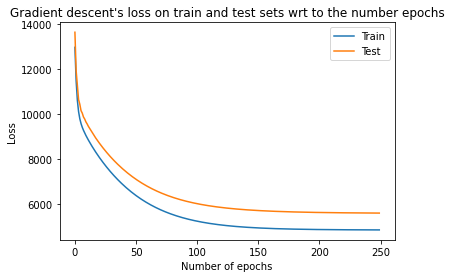

w= [[15925.37277446]
 [ -716.56349949]
 [-2002.71184795]
 [ -109.0184154 ]
 [ -415.47548714]
 [ -419.57036409]
 [  229.75199339]]


In [15]:
# Parameters choice
tau = 5e-2
epochs = 250

# Fitting
clf = GD(X_train, y_train)
w = clf.fit(tau=tau, epochs=epochs, verbose=True, hist=True)

print("Score of GD for the train set : {:.4f}".format(clf.score(X_train, y_train)))
print("Score of GD for the test set : {:.4f}".format(clf.score(X_test, y_test)))

plt.plot(np.arange(epochs), clf.hist['train'], label='Train')
plt.plot(np.arange(epochs), clf.hist['test'], label='Test')
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Gradient descent's loss on train and test sets wrt to the number epochs")

plt.show()

print("w=",w)



>>> #### Results verification using sklearn built-in functions

To verify the results, we use the LinearRegression function of the sklearn librairy.


In [16]:
from sklearn.linear_model import LinearRegression

clf_sklearn = LinearRegression()
clf_sklearn.fit(X_train, y_train)

score = clf_sklearn.score(X_test, y_test)
print("With sklearn built-in methods,\nthe Batch Gradient Descent score on the test set is {:.4f}".format(score))

With sklearn built-in methods,
the Batch Gradient Descent score on the test set is 0.7643


We obtain approximately the same results.

>>>#### Tuning on the hyperparameter $\tau$

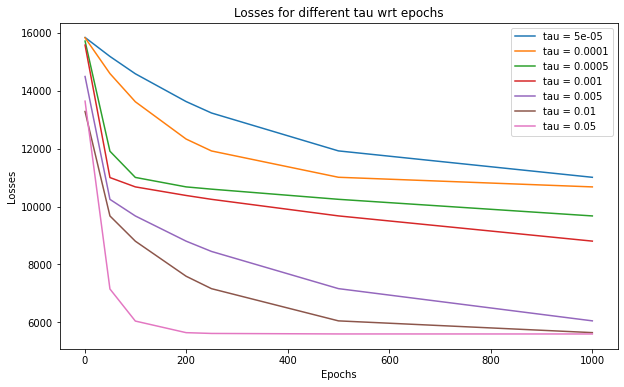

In [17]:
Epochs = [1, 50, 100, 200, 250, 500, 1000]
Tau = [5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2]

Tau_losses = []
for tau in Tau:
  Losses = []
  for e in Epochs:
    clf = GD(X_train, y_train)
    w = clf.fit(tau=tau, epochs=e)
    loss = clf.loss(X_test, y_test)
    Losses.append(loss)
  Tau_losses.append(Losses)

plt.figure(figsize=(10,6))
for i in range(len(Tau_losses)):
  plt.plot(Epochs, Tau_losses[i], label="tau = {}".format(Tau[i]))
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.title("Losses for different tau wrt epochs")

plt.show()

In [14]:
tau = 0.06

clf = GD(X_train, y_train)
w = clf.fit(tau=tau, epochs=250)
loss = clf.loss(X_test, y_test)
score = clf.score(X_test, y_test)
print("Test set \n Score : {} | Loss : {}".format(score, loss))


Test set 
 Score : -3514000.8574485662 | Loss : 19870732.269094385


For higher values of tau, the score decreases drastically. Indeed, as we saw in class, a large value of tau can cause the algorithm not to converge.

For very small values of tau, the algorithm tends to converge but it is very slow. Just like what we saw in class: a small learning rate will make small steps to reach minimum and the algorithm would need more than 200 epochs to reach minimum.

>>### **Accelerated gradient descent (Nesterov)**


The function $$f(w) = \frac{1}{2n}\|Xw−y\|^2$$ is convex. 

We are going to use Nesterov algorithm for convex functions.

The iteration step is :

Let $w_0 \in \mathbb{R}^d$, and $w_{-1} = w_0$

$\forall i\ge0 $

$w_{i+1} = w_i - \tau_i \nabla f(w_i + \beta_i (w_i - w_{i-1})) + \beta_i (w_i - w_{i-1})$

where $\beta_i = \frac{t_i -1}{t_{i+1}}$ and $t_{i+1}=\frac{1}{2}(1+\sqrt{1 + i*t_i^2})$ and $t_0 = 0$






In [18]:
class NAG(Init):
  ''' Class of the Nesterov Accelerated Gradient Descent algorithm'''

  def __init__(self, X, y):
    ''' Initialization method 
        -----------------------
        Inputs:
          X numpy.array of shape (n,m) -- the data
          y numpy.array of shape (n,1) -- the target '''
    super().__init__(X, y)
 
  def fit(self, tau=3e-2, epochs=300, verbose=False, hist=False):
    ''' Method for training the model
        ----------------------
        Inputs:
          tau float -- the learning rate of the model
          epochs integer -- the number of epochs
          verbose boolean -- whether to display the informations during the trainig or not
          hist boolean -- whether to save the losses in the hist dictionnary or not
        Outputs:
          w numpy.array of shape (n,1) -- the weights of the model '''

    if(verbose): print("[INFO] Training...")
    
    w_i = self.w
    w_i_1 = self.w

    t_i = 0
    t_i1 = 0
  
    for i in range(epochs):
      t_i1 = .5 * (1 + sqrt(1+i*t_i**2)) 
      beta_i = (t_i -1)/t_i1

      #Update de t_i
      t_i = t_i1

      #Gradient computation
      grad = ((1+beta_i)**2*(self.X.T@self.X@w_i) - (1+beta_i)*beta_i*(self.X.T@self.X@w_i_1) - (1+beta_i)*self.X.T@self.y)/self.n

      temp = w_i - tau*grad + beta_i*(w_i - w_i_1)
      w_i_1 = w_i
      w_i = temp
      self.w = w_i

      score = self.score(self.X, self.y)
      loss = self.loss(self.X, self.y)

      if(hist):
        self.hist['train'].append(loss)
        self.hist['test'].append(self.loss(X_test, y_test))

      if(verbose and (i==0 or (i+1)%10 == 0)):
        print("\t[INFO] epoch {}: score = {:.3f} | loss = {:.3f}".format(int(i+1), score, loss))

    self.w = w_i

    return self.w

[INFO] Training...
	[INFO] epoch 1: score = -1.362 | loss = 15533.774
	[INFO] epoch 10: score = 0.240 | loss = 8814.334
	[INFO] epoch 20: score = 0.477 | loss = 7310.830
	[INFO] epoch 30: score = 0.580 | loss = 6553.940
	[INFO] epoch 40: score = 0.637 | loss = 6089.331
	[INFO] epoch 50: score = 0.674 | loss = 5772.249
	[INFO] epoch 60: score = 0.699 | loss = 5546.424
	[INFO] epoch 70: score = 0.717 | loss = 5381.731
	[INFO] epoch 80: score = 0.729 | loss = 5259.775
	[INFO] epoch 90: score = 0.739 | loss = 5168.482
	[INFO] epoch 100: score = 0.745 | loss = 5099.577
	[INFO] epoch 110: score = 0.751 | loss = 5047.222
	[INFO] epoch 120: score = 0.755 | loss = 5007.220
	[INFO] epoch 130: score = 0.758 | loss = 4976.508
	[INFO] epoch 140: score = 0.760 | loss = 4952.828
	[INFO] epoch 150: score = 0.762 | loss = 4934.499
	[INFO] epoch 160: score = 0.763 | loss = 4920.264
	[INFO] epoch 170: score = 0.764 | loss = 4909.173
	[INFO] epoch 180: score = 0.765 | loss = 4900.507
	[INFO] epoch 190: sc

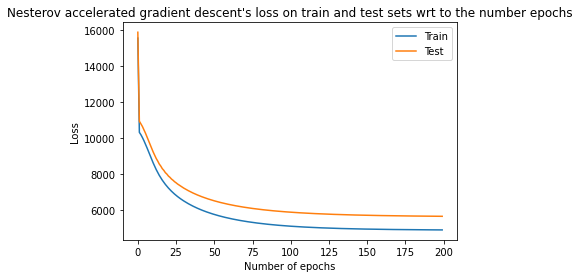

w= [[15530.88961779]
 [ -657.09053201]
 [-1956.12498859]
 [  -51.58673254]
 [ -400.6555097 ]
 [ -411.69535186]
 [  178.79105882]]


In [20]:
# Parameters choice
tau = 3e-2
epochs = 200

# Fitting
clf = NAG(X_train, y_train)
w = clf.fit(tau=tau, epochs=epochs, verbose=True, hist=True)

print("Score of NAG for the train set : {:.4f}".format(clf.score(X_train, y_train)))
print("Score of NAG for the test set : {:.4f}".format(clf.score(X_test, y_test)))

plt.plot(np.arange(epochs), clf.hist['train'], label='Train')
plt.plot(np.arange(epochs), clf.hist['test'], label='Test')
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Nesterov accelerated gradient descent's loss on train and test sets wrt to the number epochs")

plt.show()

print("w=",w)

>>>#### Tuning on the hyperparameter $\tau$

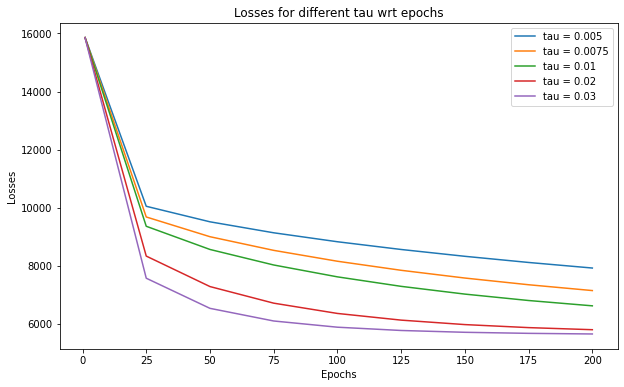

In [25]:
Epochs = [1, 25, 50, 75, 100, 125, 150, 175, 200]
Tau = [5e-3, 7.5e-3, 1e-2, 2e-2, 3e-2]

Tau_losses = []
for tau in Tau:
  Losses = []
  for e in Epochs:
    clf = NAG(X_train, y_train)
    w = clf.fit(tau=tau, epochs=e)
    loss = clf.loss(X_test, y_test)
    Losses.append(loss)
  Tau_losses.append(Losses)

plt.figure(figsize=(10,6))
for i in range(len(Tau_losses)):
  plt.plot(Epochs, Tau_losses[i], label="tau = {}".format(Tau[i]))
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.title("Losses for different tau wrt epochs")

plt.show()

In [24]:
tau = 5e-2

clf = NAG(X_train, y_train)
w = clf.fit(tau=tau, epochs=200)
loss = clf.loss(X_test, y_test)
score = clf.score(X_test, y_test)
print("Test set \n Score : {} | Loss : {}".format(score, loss))


Test set 
 Score : -3.0740087785230328e+69 | Loss : 5.87713179910319e+38


For higher values of tau, the score decreases drastically. Indeed, as we saw in class, a large value of tau can cause the algorithm not to converge.

For very small values of tau, the algorithm tends to converge but it is very slow. Just like what we saw in class: a small learning rate will make small steps to reach minimum and the algorithm would need more than 200 epochs to reach minimum.

>>### **Stochastic gradient descent**


$$\min_w f(w)≡\frac{1}{n}\sum_{i=1}^n f_i (w)= \frac{1}{n}\sum_{i=1}^n \frac{1}{2}(x_i w − y_i)^2$$

The algorithm reads
$$w_{k+1}=w_k −\tau_k \nabla f_{i_k}(w_k)$$
where at each iteration $i_k$ is drawn in $\{1,…,n\}$ uniformly at random.

In [13]:
class SGD(Init):
  ''' Class of the Stochastic Gradient Descent algorithm'''

  def __init__(self, X, y):
    ''' Initialization method 
        -----------------------
        Inputs:
          X numpy.array of shape (n,m) -- the data
          y numpy.array of shape (n,1) -- the target '''
    super().__init__(X, y)

     
  def fit(self, tau=0.05, tau_behavior=0.25, batch_size=128, nb_iter=2500, with_replace=False, verbose=False, hist=False):
    ''' Method for training the model
        ----------------------
        Inputs:
          tau: float -- the learning rate of the model
          tau_behavior: float -- the strategy to compute the learning rate
                t==0, constant equal to 1/L, with L lipschitz constant (default)
                t>0, decreases in 1/(k+1)**t
          epochs: integer -- the number of epochs
          batch_size: integer -- the size of the batch samples
          nb_iter: integer -- the number of iterations
          with_replace: boolean -- indicating whether components are drawn with or without replacement
                True: Components drawn with replacement
                False: Components drawn without replacement (Default)
          verbose: boolean -- whether to display the informations during the trainig or not
          hist: boolean -- whether to save the losses in the hist dictionnary or not
        Outputs:
          w numpy.array of shape (n,1) -- the weights of the model '''
    if(verbose): print("[INFO] Training...")

    L = self.lipgrad()
    
    for k in range(nb_iter):
      # Draw the batch indices
      ik = np.random.choice(self.n, batch_size, replace=with_replace)# Batch gradient
     
      # Stochastic gradient calculation
      sg = np.zeros((self.m,1))
      for j in range(batch_size):
          gi = self.grad_i(ik[j], self.w).reshape(((self.m,1)))
          sg = sg + gi
      sg = (1/batch_size)*sg

      if tau_behavior==0:
            self.w = self.w - (tau/L) * sg
      elif tau_behavior>0:
          sk = float(tau/((k+1)**tau_behavior))
          self.w = self.w - sk * sg

      score = self.score(self.X, self.y)
      loss = self.loss(self.X, self.y)

      if((hist or verbose) and (k*batch_size)%self.n == 0):
        self.hist['train'].append(loss)
        self.hist['test'].append(self.loss(X_test, y_test))
        print("\t[INFO] epoch {}: \tscore = {:.3f} \t| loss = {:.3f}".format(int(k), score, loss))

    return self.w

[INFO] Training...
	[INFO] epoch 0: 	score = -1.351 	| loss = 15500.013
	[INFO] epoch 5100: 	score = 0.450 	| loss = 7495.978
	[INFO] epoch 10200: 	score = 0.637 	| loss = 6089.952
	[INFO] epoch 15300: 	score = 0.714 	| loss = 5407.907
	[INFO] epoch 20400: 	score = 0.747 	| loss = 5085.785
	[INFO] epoch 25500: 	score = 0.760 	| loss = 4953.460
	[INFO] epoch 30600: 	score = 0.765 	| loss = 4903.869
	[INFO] epoch 35700: 	score = 0.766 	| loss = 4889.656
	[INFO] epoch 40800: 	score = 0.767 	| loss = 4880.188
	[INFO] epoch 45900: 	score = 0.767 	| loss = 4876.469
	[INFO] epoch 51000: 	score = 0.767 	| loss = 4880.964
	[INFO] epoch 56100: 	score = 0.768 	| loss = 4873.653
	[INFO] epoch 61200: 	score = 0.768 	| loss = 4873.641
	[INFO] epoch 66300: 	score = 0.767 	| loss = 4876.057
	[INFO] epoch 71400: 	score = 0.767 	| loss = 4882.903
	[INFO] epoch 76500: 	score = 0.766 	| loss = 4885.539
	[INFO] epoch 81600: 	score = 0.768 	| loss = 4869.737
	[INFO] epoch 86700: 	score = 0.768 	| loss = 486

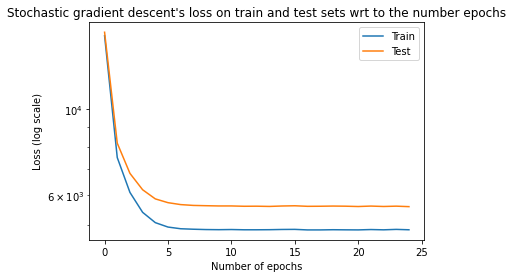

w= [[16500.64676004]
 [ -864.83044226]
 [-2028.29875799]
 [ -169.05191551]
 [ -531.78669166]
 [ -452.70283664]
 [  368.62197753]]


In [32]:
# Parameters choice
epochs = 25
batch_size = 1
tau_behavior = 0
tau = 0.01

# Fitting
clf = SGD(X_train, y_train)
w = clf.fit(tau=tau, tau_behavior=tau_behavior, batch_size=batch_size, nb_iter=int(epochs*X_train.shape[0]/batch_size), with_replace=False, verbose=True, hist=True)

print("Score of SGD for the train set : {:.4f}".format(clf.score(X_train, y_train)))
print("Score of SGD for the test set : {:.4f}".format(clf.score(X_test, y_test)))

plt.plot(clf.hist['train'], label='Train')
plt.plot(clf.hist['test'], label='Test')
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Loss (log scale)")
plt.title("Stochastic gradient descent's loss on train and test sets wrt to the number epochs")

plt.show()

print("w=",w)

>>> #### Results verification using sklearn built-in functions

To verify the results, we use the SGDRegressor function of the sklearn librairy.

In [23]:
from sklearn.linear_model import SGDRegressor

clf_sklearn = SGDRegressor(learning_rate='constant', max_iter=epochs)
clf_sklearn.fit(X_train, y_train)

score = clf_sklearn.score(X_test, y_test)
print("With sklearn built-in methods,\nthe SGD score on the test set is {:.4f}".format(score))

With sklearn built-in methods,
the SGD score on the test set is 0.7437


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We obtain approximately the same results.

>>> #### Tuning on the hyperparameters $\tau$, tau_behavior and batch_size

>>>>##### Gradient descent versus Stochastic gradient

In [40]:
epochs = 100
n = X_train.shape[0]
nb_batch = 1

#Gradient descent with constant stepsize
print("Gradient descent with constant step size")
clf = SGD(X_train, y_train)
clf.fit(tau=0.005, tau_behavior=0, batch_size=n, nb_iter=epochs, with_replace=False, verbose=True, hist=True)
losses_a = clf.hist['test']

#Stochastic gradient with constant stepsize
print("Stochastic gradient with constant step size")
clf = SGD(X_train, y_train)
clf.fit(tau=0.005, tau_behavior=0, batch_size=1, nb_iter=epochs*n, with_replace=False, verbose=True, hist=True)
losses_b = clf.hist['test']

#Gradient descent with decreasing stepsize
print("Gradient descent with decreasing step size")
clf = SGD(X_train, y_train)
clf.fit(tau=0.05, tau_behavior=0.5, batch_size=n, nb_iter=epochs, with_replace=False, verbose=True, hist=True)
losses_c = clf.hist['test']

#Stochastic gradient with decreasing stepsize
print("Stochastic gradient with decreasing step size")
clf = SGD(X_train, y_train)
clf.fit(tau=0.05, tau_behavior=0.5, batch_size=1, nb_iter=epochs*n, with_replace=False, verbose=True, hist=True)
losses_d = clf.hist['test']


Gradient descent with constant step size
[INFO] Training...
	[INFO] epoch 0: 	score = -1.347 	| loss = 15485.493
	[INFO] epoch 1: 	score = -1.334 	| loss = 15442.734
	[INFO] epoch 2: 	score = -1.321 	| loss = 15400.281
	[INFO] epoch 3: 	score = -1.309 	| loss = 15358.133
	[INFO] epoch 4: 	score = -1.296 	| loss = 15316.286
	[INFO] epoch 5: 	score = -1.284 	| loss = 15274.741
	[INFO] epoch 6: 	score = -1.271 	| loss = 15233.495
	[INFO] epoch 7: 	score = -1.259 	| loss = 15192.546
	[INFO] epoch 8: 	score = -1.247 	| loss = 15151.894
	[INFO] epoch 9: 	score = -1.235 	| loss = 15111.535
	[INFO] epoch 10: 	score = -1.223 	| loss = 15071.469
	[INFO] epoch 11: 	score = -1.211 	| loss = 15031.693
	[INFO] epoch 12: 	score = -1.200 	| loss = 14992.207
	[INFO] epoch 13: 	score = -1.188 	| loss = 14953.008
	[INFO] epoch 14: 	score = -1.177 	| loss = 14914.095
	[INFO] epoch 15: 	score = -1.166 	| loss = 14875.467
	[INFO] epoch 16: 	score = -1.155 	| loss = 14837.120
	[INFO] epoch 17: 	score = -1.14

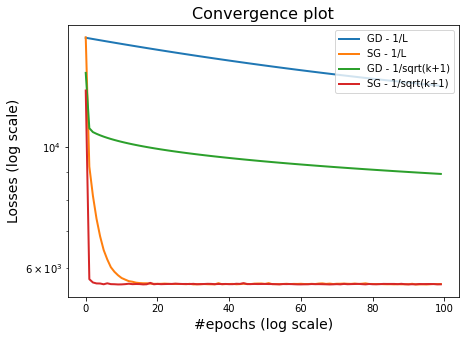

In [41]:
# Plot the comparison of variants of GD/SG with the same stepsize rule
# NB: The x-axis is in epochs (1 iteration of GD).

# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(losses_a, label="GD - 1/L", lw=2)
plt.semilogy(losses_b, label="SG - 1/L", lw=2)
plt.semilogy(losses_c, label="GD - 1/sqrt(k+1)", lw=2)
plt.semilogy(losses_d, label="SG - 1/sqrt(k+1)", lw=2)

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Losses (log scale)", fontsize=14)
plt.legend()

plt.show()

- The stochastic gradient algorithm is not a descent method. As such, it is not guaranteed to decrease the function value in a monotone fashion (unlike gradient descent), and it may not even converge on some instances. 

- The red curve (SG with decreasing stepsize) illustrates a commonly observed behavior of SG, characterized by rapid progress during the first iterations, followed by an "oscillating phase" indicating that the method stalls and is taking small steps that marginally improve or worsen the objective value.

>>>>##### Test of different values for $\tau$ (constant)

In [42]:
# Run several instances of stochastic gradient with constant batch size
epochs = 100
n = X_train.shape[0]
nb_batch = 1

valstau = [1, 0.1, 0.01, 0.001, 0.0001]
nvals = len(valstau)

losses = []

for val in range(nvals):
    clf = SGD(X_train, y_train)
    clf.fit(tau=valstau[val], tau_behavior=0, batch_size=nb_batch, nb_iter=int(epochs*n/nb_batch), with_replace=False, verbose=True, hist=True)
    losses.append(clf.hist['test'])


[INFO] Training...
	[INFO] epoch 0: 	score = -0.696 	| loss = 13163.963
	[INFO] epoch 5100: 	score = 0.671 	| loss = 5800.055
	[INFO] epoch 10200: 	score = 0.598 	| loss = 6409.428
	[INFO] epoch 15300: 	score = 0.500 	| loss = 7145.906
	[INFO] epoch 20400: 	score = 0.700 	| loss = 5538.267
	[INFO] epoch 25500: 	score = 0.431 	| loss = 7623.765
	[INFO] epoch 30600: 	score = 0.698 	| loss = 5557.156
	[INFO] epoch 35700: 	score = 0.627 	| loss = 6176.378
	[INFO] epoch 40800: 	score = 0.397 	| loss = 7849.986
	[INFO] epoch 45900: 	score = 0.595 	| loss = 6431.131
	[INFO] epoch 51000: 	score = 0.722 	| loss = 5333.756
	[INFO] epoch 56100: 	score = 0.692 	| loss = 5609.330
	[INFO] epoch 61200: 	score = 0.268 	| loss = 8647.493
	[INFO] epoch 66300: 	score = 0.672 	| loss = 5787.007
	[INFO] epoch 71400: 	score = 0.349 	| loss = 8154.084
	[INFO] epoch 76500: 	score = 0.475 	| loss = 7324.290
	[INFO] epoch 81600: 	score = 0.639 	| loss = 6069.636
	[INFO] epoch 86700: 	score = 0.492 	| loss = 720

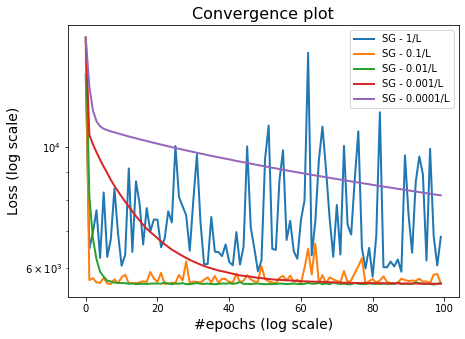

In [43]:
# Plot the comparison of variants of SG with different (constant) stepsizes
# NB: The x-axis is in epochs (1 iteration of GD).

plt.figure(figsize=(7, 5))
plt.set_cmap("RdPu")
for val in range(nvals):
    plt.semilogy(losses[val], label="SG - "+str(valstau[val])+"/L", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Loss (log scale)", fontsize=14)
plt.legend()

plt.show()

- **For constant stepsizes:** 
  - Using a very small stepsize will lead to slow convergence (as illustrated by the violet curve $\tfrac{0.0001}{L}$). We expect this slow convergence behavior to be followed by an oscillatory phase, which we can readily see with other stepsize choices.
  - The green and orange curves ($\tfrac{0.01}{L}$ and $\tfrac{0.1}{L}$, respectively) illustrate the trade-off between having a small stepsize, that guarantees convergence to a small neighborhood of the optimum, and having a large stepsize, that leads to faster convergence (but to a large neighborhood).
  - The blue curve oscillates very much, which indicates that the stepsize is too large. 

>>>> ##### Test of different values for $\tau$ (decreasing)

In [48]:
# Run several instances of stochastic gradient with constant batch size
epochs = 20
n = X_train.shape[0]
nb_batch = 1

decstep = [1, 2/3, 1/2, 1/4, 0]
nvals = len(decstep)

losses = []

for val in range(nvals):
    clf = SGD(X_train, y_train)
    clf.fit(tau=0.05, tau_behavior=decstep[val], batch_size=nb_batch, nb_iter=int(epochs*n/nb_batch), with_replace=False, verbose=True, hist=True)
    losses.append(clf.hist['test'])

[INFO] Training...
	[INFO] epoch 0: 	score = -0.235 	| loss = 11231.096
	[INFO] epoch 5100: 	score = 0.180 	| loss = 9153.334
	[INFO] epoch 10200: 	score = 0.197 	| loss = 9060.193
	[INFO] epoch 15300: 	score = 0.206 	| loss = 9008.888
	[INFO] epoch 20400: 	score = 0.212 	| loss = 8974.430
	[INFO] epoch 25500: 	score = 0.216 	| loss = 8948.466
	[INFO] epoch 30600: 	score = 0.220 	| loss = 8927.219
	[INFO] epoch 35700: 	score = 0.223 	| loss = 8909.054
	[INFO] epoch 40800: 	score = 0.226 	| loss = 8893.775
	[INFO] epoch 45900: 	score = 0.228 	| loss = 8880.236
	[INFO] epoch 51000: 	score = 0.230 	| loss = 8868.566
	[INFO] epoch 56100: 	score = 0.232 	| loss = 8857.699
	[INFO] epoch 61200: 	score = 0.234 	| loss = 8847.812
	[INFO] epoch 66300: 	score = 0.235 	| loss = 8839.444
	[INFO] epoch 71400: 	score = 0.237 	| loss = 8830.993
	[INFO] epoch 76500: 	score = 0.238 	| loss = 8823.661
	[INFO] epoch 81600: 	score = 0.239 	| loss = 8816.408
	[INFO] epoch 86700: 	score = 0.240 	| loss = 880

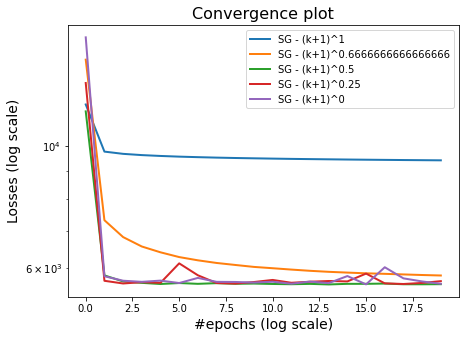

In [49]:
# Plot the comparison of variants of SG with different (decreasing) stepsizes
# NB: The x-axis is in epochs (1 iteration of GD).

# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.set_cmap("RdPu")
for val in range(nvals):
    plt.semilogy(losses[val], label="SG - (k+1)^"+str(decstep[val]), lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Losses (log scale)", fontsize=14)
plt.legend(loc=1)

plt.show()

- **For decreasing stepsizes:** 
  - The observations are similar, but we expect a rapidly decreasing stepsize sequence to lead to a sublinear convergence rate, without any oscillation around a certain value. This appears to be the case for the choices $\alpha_k = \tfrac{1}{k+1}$ and $\alpha_k = \tfrac{1}{(k+1)^{2/3}}$. 
  - On the other hand, the lowest losses (in 20 epochs) are reached by the green red and purple curves, despite an oscillatory trend.

>>>> ##### Test of different values for the batch size

In [46]:
# Test several values for the batch size using the same epoch budget.
epochs = 100
n = X_train.shape[0]

valsbatch = [1, int(n/100), int(n/10), int(n/2), n]
replace_batch=False

losses = []

for val in range(len(valsbatch)):
  clf = SGD(X_train, y_train)
  clf.fit(tau=0.05, tau_behavior=0.25, nb_iter=int(epochs*n/valsbatch[val]), batch_size=valsbatch[val], with_replace=replace_batch, verbose=True, hist=True)
  losses.append(clf.hist['test'])

[INFO] Training...
	[INFO] epoch 0: 	score = -0.094 	| loss = 10573.402
	[INFO] epoch 5100: 	score = 0.731 	| loss = 5242.212
	[INFO] epoch 10200: 	score = 0.760 	| loss = 4956.673
	[INFO] epoch 15300: 	score = 0.650 	| loss = 5981.156
	[INFO] epoch 20400: 	score = 0.762 	| loss = 4930.787
	[INFO] epoch 25500: 	score = 0.759 	| loss = 4961.654
	[INFO] epoch 30600: 	score = 0.749 	| loss = 5068.373
	[INFO] epoch 35700: 	score = 0.763 	| loss = 4919.347
	[INFO] epoch 40800: 	score = 0.752 	| loss = 5034.516
	[INFO] epoch 45900: 	score = 0.742 	| loss = 5136.958
	[INFO] epoch 51000: 	score = 0.764 	| loss = 4914.309
	[INFO] epoch 56100: 	score = 0.764 	| loss = 4913.183
	[INFO] epoch 61200: 	score = 0.766 	| loss = 4884.723
	[INFO] epoch 66300: 	score = 0.766 	| loss = 4892.482
	[INFO] epoch 71400: 	score = 0.749 	| loss = 5063.970
	[INFO] epoch 76500: 	score = 0.765 	| loss = 4901.218
	[INFO] epoch 81600: 	score = 0.763 	| loss = 4922.834
	[INFO] epoch 86700: 	score = 0.751 	| loss = 504

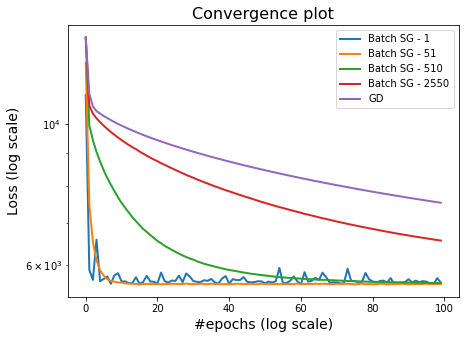

In [47]:
# Plot the comparison of variants of batch SGD with the same stepsize rule

# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
for val in range(len(valsbatch)-1):
  plt.semilogy(losses[val], label="Batch SG - {}".format(valsbatch[val]), lw=2)

plt.semilogy(losses[-1], label="GD", lw=2)

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Loss (log scale)", fontsize=14)
plt.legend()

plt.show()

- **For different batch sizes:** 
  - As in the graph in which we compared GD and SG, SG converges faster than GD (blue vs violet curves).
  - Big batch sizes leads to slower convergence whereas small ones converge really fast (blue and orange curves). The orange curve illustrates the mini-batch SG setting and converges nicely.
  - The green curve, which is for batch size 510, converges nicely, faster than higher batch size or GD but slower than mini-batch and SG. 

In [37]:
# Compare a batch method with a stochastic gradient technique using comparable step 
epochs = 100
replace_batch=False

# Stochastic gradient (batch size 1)
clf = SGD(X_train, y_train)
clf.fit(tau=0.05, tau_behavior=0.25, nb_iter=epochs*n, batch_size=1, verbose=True, hist=True)
loss_a = clf.hist['test']

# Batch stochastic gradient (batch size n/10)
nbset=int(n/10)
clf = SGD(X_train, y_train)
clf.fit(tau=0.05, tau_behavior=0.25, nb_iter=int(epochs*n/nbset), batch_size=nbset, with_replace=replace_batch, verbose=True, hist=True)
loss_b = clf.hist['test']

# Stochastic gradient (batch size 1)
clf = SGD(X_train, y_train)
clf.fit(tau=0.05/nbset, tau_behavior=0.25, nb_iter=epochs*n, batch_size=1, verbose=True, hist=True)
loss_c = clf.hist['test']


[INFO] Training...
	[INFO] epoch 0: 	score = -0.708 	| loss = 13208.583
	[INFO] epoch 5100: 	score = 0.743 	| loss = 5122.512
	[INFO] epoch 10200: 	score = 0.758 	| loss = 4969.712
	[INFO] epoch 15300: 	score = 0.765 	| loss = 4901.379
	[INFO] epoch 20400: 	score = 0.760 	| loss = 4955.409
	[INFO] epoch 25500: 	score = 0.741 	| loss = 5146.144
	[INFO] epoch 30600: 	score = 0.767 	| loss = 4877.671
	[INFO] epoch 35700: 	score = 0.754 	| loss = 5011.552
	[INFO] epoch 40800: 	score = 0.764 	| loss = 4908.993
	[INFO] epoch 45900: 	score = 0.760 	| loss = 4946.865
	[INFO] epoch 51000: 	score = 0.760 	| loss = 4953.223
	[INFO] epoch 56100: 	score = 0.746 	| loss = 5096.221
	[INFO] epoch 61200: 	score = 0.763 	| loss = 4919.227
	[INFO] epoch 66300: 	score = 0.752 	| loss = 5029.206
	[INFO] epoch 71400: 	score = 0.718 	| loss = 5371.010
	[INFO] epoch 76500: 	score = 0.767 	| loss = 4874.743
	[INFO] epoch 81600: 	score = 0.725 	| loss = 5300.272
	[INFO] epoch 86700: 	score = 0.733 	| loss = 522

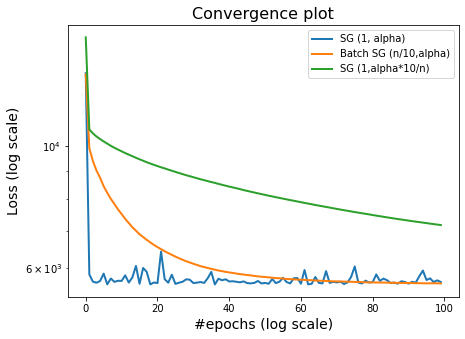

In [38]:
# Plot the comparison of variants of batch SGD with the same stepsize rule

# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(loss_a, label="SG (1, tau)", lw=2)
plt.semilogy(loss_b, label="Batch SG (n/10,tau)", lw=2)
plt.semilogy(loss_c, label="SG (1,tau*10/n)", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Loss (log scale)", fontsize=14)
plt.legend()

plt.show()

We see that the green curve which represents the stochastic gradient with a decreasing learning rate is the slowest to converge. We can also notice that the blue curve representing the classical stochastic gradient has a typically SG attitude meaning it makes a lot of progress during the first steps of the convergence and then it has a "bumpy" attitude towards the end. Finally, the orange curve is the one that reaches minimum and that has the lowest variance (no bumpy attitude).

We can conclude that mini-batch SG is the method that works the best here.

>>>> ##### Finding the best hyperparameters

This cell takes approximately 20min to run.

In [30]:
# Parameters choice
epochs = 25
Batch_size = [1, 32, 64, 128, 256, 512]
Tau_behavior = [0, 0.25, 0.5, 0.75, 1]
Tau = [1e-3, 5e-2, 1e-2]

# Fit
Losses = []
parameters = {"batch_size": 0,
              "tau_behavior": 0,
              "tau": 0}

for b in Batch_size:
  print("batch_size = {}".format(b))
  for tau_b in Tau_behavior:
    print("\ttau_behavior = {}".format(tau_b))
    for tau in Tau:
      print("\t\ttau = {}".format(tau))
      clf = SGD(X_train, y_train)
      clf.fit(tau=tau, tau_behavior=tau_b, batch_size=b, nb_iter=int(epochs*X_train.shape[0]/b))
      loss = clf.loss(X_test, y_test)
      Losses.append(loss)
      if loss == min(Losses):
        parameters['batch_size'] = b
        parameters['tau_behavior'] = tau_b
        parameters['tau'] = tau

batch_size = 1
	tau_behavior = 0
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 0.25
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 0.5
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 0.75
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 1
		tau = 0.001
		tau = 0.05
		tau = 0.01
batch_size = 32
	tau_behavior = 0
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 0.25
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 0.5
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 0.75
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 1
		tau = 0.001
		tau = 0.05
		tau = 0.01
batch_size = 64
	tau_behavior = 0
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 0.25
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 0.5
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 0.75
		tau = 0.001
		tau = 0.05
		tau = 0.01
	tau_behavior = 1
		tau = 0.001
		tau = 0.05
		tau = 0.01
batch_size = 128
	tau_behavior = 0
		tau = 0.001
		tau = 0.

In [31]:
print(parameters)

{'batch_size': 1, 'tau_behavior': 0, 'tau': 0.01}


>>### **Regularization - Ridge & Lasso**


>>> #### Ridge

Regularization is obtained by introducing a penalty. 

It is defined as: 
$$\min_w \frac{1}{2}\|Xw−y\|^2 + \lambda\frac{1}{2}\|w\|^2$$
where $\lambda>0$ is the regularization parameter. If $\lambda = 0$, we find ourselves in the Ordinary Least Squares (OLS) situation.

The solution is given using the following equivalent formula:
$$ w = (X^\top X+\lambda Id_m)^{−1}X^\top y, $$
$$ w = X^\top (XX^\top + \lambda Id_n)^{−1}y, $$
When $m<n$ (which is the case here), the first formula should be prefered.


In [16]:
class Ridge_Reg(Init):
  ''' Class of the Ridge Regularization algorithm'''
  def __init__(self, X, y, lbda):
    ''' Initialization method 
        -----------------------
        Inputs:
          X numpy.array of shape (n,m) -- the data
          y numpy.array of shape (n,1) -- the target
          lbda float -- the regularization parameter '''

    super().__init__(X, y)
    self.lbda = lbda
 
  def fit(self):
    ''' Method for training the model
        ----------------------
        Outputs:
          w numpy.array of shape (n,1) -- the weights of the model '''

    if self.m < self.n : self.w = (np.linalg.inv((self.X.T @ self.X) + self.lbda*np.eye(self.m)) @ (self.X.T @ self.y))
    else: self.w = (self.X.T @ np.linalg.inv((self.X @ self.X.T) + self.lbda*np.eye(self.n)) @ self.y)

    return self.w

In [36]:
lbda = 0.5
clf = Ridge_Reg(X_train, y_train, lbda=lbda)
w = clf.fit()
score_test = clf.score(X_test, y_test)
score_train = clf.score(X_train, y_train)

print("Score of Ridge Regression for the train set : {:.4f}".format(score_train))
print("Score of Ridge Regression for the test set : {:.4f}".format(score_test))

print("w=",w)

Score of Ridge Regression for the train set : 0.7681
Score of Ridge Regression for the test set : 0.7208
w= [[16322.16922477]
 [ -773.005781  ]
 [-2053.12209253]
 [ -169.99661942]
 [ -432.76541712]
 [ -429.90197803]
 [  431.92788037]]


>>>> ##### Results verification using sklearn built-in functions

To verify the results, we use the Ridge function of the sklearn librairy.

In [38]:
from sklearn.linear_model import Ridge

clf_sklearn = Ridge(alpha = .5)
clf_sklearn.fit(X_train, y_train)

score = clf_sklearn.score(X_test, y_test)
print("With sklearn built-in methods,\nthe ridge regularization score on the test set is {:.4f}".format(score))

With sklearn built-in methods,
the ridge regularization score on the test set is 0.7643


We obtain approximately the same results than with my implementation.

>>>>##### Tuning on the hyperparameter $\lambda$

In [35]:
# Parameters choice
Lambda = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-2]

# Fit
Losses = []
parameters = {"lambda": 0}

for l in Lambda:
  #print("lambda = {}".format(l))
  clf = Ridge_Reg(X_train, y_train, lbda=l)
  clf.fit()
  loss = clf.loss(X_test, y_test)
  Losses.append(loss)
  if loss == min(Losses):
    parameters['lambda'] = l

In [36]:
print(parameters)

{'lambda': 0.0001}


>>>#### Lasso Regularization
Iterative Soft Thresholding Algorithm (ISTA)

Regularization is obtained by introducing a penalty. Lasso regularization is defined as
$$\min_w \frac{1}{2}\|Xw−y\|^2 _2 + \lambda \|w\|_1$$
where $\lambda>0$ is the regularization parameter.

The ISTA performs first a gradient step (forward) of the smooth part $\frac{1}{2}\|Xw−y\|^2$ of the functional and then a proximal step (backward) step which account for the $\ell_1$ penalty and induce sparsity. This proximal step is the soft-thresholding operator 
$$𝑆_\lambda(x)=sign(x) (|x| - \lambda)_{+}.$$
where $(|x| - \lambda)_{+}=\max(|x| − \lambda,  0) = ReLU(|x| − \lambda)$.

The ISTA algorithm reads
$$w_{k+1} = 𝑆_{\lambda \tau}(w_k −\tau X^\top (Xw_k - y)).$$

In [50]:
class Lasso_Reg(Init):
  ''' Class of the Lasso using ISTA algorithm'''

  def __init__(self, X, y, lbda):
    ''' Initialization method 
        -----------------------
        Inputs:
          X numpy.array of shape (n,m) -- the data
          y numpy.array of shape (n,1) -- the target
          lbda float -- regularization parameter '''
    super().__init__(X, y)
    self.lbda = lbda

  def fit(self, tau=1e-5, epochs=300, verbose=False, hist=False):
    ''' Method for training the model
        ----------------------
        Inputs:
          tau float -- the learning rate of the model
          epochs integer -- the number of epochs
          verbose boolean -- whether to display the informations during the trainig or not
          hist boolean -- whether to save the losses in the hist dictionnary or not
        Outputs:
          w numpy.array of shape (n,1) -- the weights of the model '''

    if(verbose): print("[INFO] Training...")

    for i in range(epochs):
      tmp = self.w - tau*self.grad(self.w)
      self.w = Soft(tmp,self.lbda*tau)

      score = self.score(self.X, self.y)
      loss = self.loss(self.X, self.y)

      if(hist):
        self.hist['train'].append(loss)
        self.hist['test'].append(self.loss(X_test, y_test))

      if(verbose and (i==0 or (i+1)%20 == 0)):
        print("\t[INFO] epoch {}: score = {:.3f} | loss = {:.3f}".format(int(i+1), score, loss))

    return self.w

def ReLU(x):
  ''' Function for computing the ReLU of an input x
        ----------------------
        Inputs:
          x numpy.array -- the data
        Outputs:
          numpy.array of shape (n,1) -- the element-wise maximum array '''
  return np.maximum(np.zeros((x.shape[0],1)), x)   
 
def Soft(x,s): 
  ''' Function for computing the Soft thresholding
        ----------------------
        Inputs:
          x numpy.array -- the data
          s float -- the soft thresholding parameter
        Outputs:
          numpy.array of shape (n,1) '''
  return np.sign(x)*ReLU(abs(x)-s)

[INFO] Training...
	[INFO] epoch 1: score = -0.648 | loss = 12975.809
	[INFO] epoch 20: score = 0.348 | loss = 8163.765
	[INFO] epoch 40: score = 0.535 | loss = 6892.068
	[INFO] epoch 60: score = 0.639 | loss = 6076.084
	[INFO] epoch 80: score = 0.696 | loss = 5571.748
	[INFO] epoch 100: score = 0.728 | loss = 5270.883
	[INFO] epoch 120: score = 0.746 | loss = 5096.075
	[INFO] epoch 140: score = 0.756 | loss = 4996.282
	[INFO] epoch 160: score = 0.761 | loss = 4939.920
	[INFO] epoch 180: score = 0.764 | loss = 4908.275
	[INFO] epoch 200: score = 0.766 | loss = 4890.560
Score of Lasso for the train set : 0.7659
Score of Lasso for the test set : 0.7162


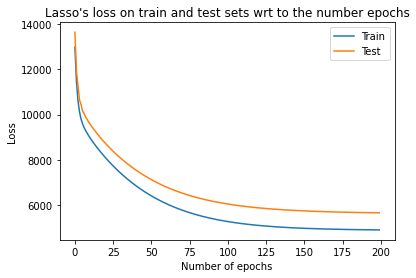

w= [[15489.13388734]
 [ -650.76095159]
 [-1951.18671061]
 [  -45.58655766]
 [ -398.99983002]
 [ -410.76053859]
 [  173.4395022 ]]


In [51]:
# Parameters
tau = 5e-2
epochs = 200
lbda = 0.5

# Fitting
clf = Lasso_Reg(X_train, y_train, lbda)
w = clf.fit(tau=tau, epochs=epochs, verbose=True, hist=True)

print("Score of Lasso for the train set : {:.4f}".format(clf.score(X_train, y_train)))
print("Score of Lasso for the test set : {:.4f}".format(clf.score(X_test, y_test)))

#Plot of the graphs
plt.plot(np.arange(epochs), clf.hist['train'], label='Train')
plt.plot(np.arange(epochs), clf.hist['test'], label='Test')
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Lasso's loss on train and test sets wrt to the number epochs")

plt.show()

print("w=",w)


>>>> ##### Results verification using sklearn built-in functions

To verify the results, we use the Lasso function of the sklearn librairy.

In [62]:
from sklearn.linear_model import Lasso

clf_sklearn = Lasso(alpha = .1)
clf_sklearn.fit(X_train, y_train)

score = clf_sklearn.score(X_test, y_test)
print("With sklearn built-in methods,\nthe lasso regularization score on the test set is {:.4f}".format(score))

With sklearn built-in methods,
the lasso regularization score on the test set is 0.7643


>>>>##### Tuning on the hyperparameter $\lambda$ and $\tau$

In [57]:
# Parameters choice
epochs = 1000
Lambda = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-2]
Tau = [5e-4, 1e-4, 5e-3, 1e-3, 5e-2, 1e-2]

# Fit
Losses = []
parameters = {"lambda": 0,
              "tau": 0}

for l in Lambda:
  #print("lambda = {}".format(l))
  for tau in Tau:
    #print("\t\ttau = {}".format(tau))
    clf = Lasso_Reg(X_train, y_train, lbda=l)
    clf.fit(tau=tau, epochs=epochs)
    loss = clf.loss(X_test, y_test)
    Losses.append(loss)
    if loss == min(Losses):
      parameters['lambda'] = l
      parameters['tau'] = tau

In [59]:
parameters

{'lambda': 0.0001, 'tau': 0.05}

The best parameters for the Lasso method are $\lambda = 0.0001$ and $\tau =0.05$.

In [66]:
tau = 7e-2

clf = Lasso_Reg(X_train, y_train, lbda=.0001)
w = clf.fit(tau=tau)
score = clf.score(X_test, y_test)
loss = clf.loss(X_test, y_test)
print("Test set \n Score : {} | Loss : {}".format(score, loss))

Test set 
 Score : -7.010155250311804e+81 | Loss : 8.87517032832446e+44


For a higher value of $\tau$, the score decreases drastically meaning the algorithm doesn't converge.